# Steven Rae - Machine Learning Capstone Project - Step 4

## Using K-Nearest Neighbors Classification Technique

**Question to be Answered:** Is there a way to predict if a person is a musician(or has in interest in music) from info in their profile (specifically levels of smoking, drinking and drugs along with orientation, sex and relationship status)

Define inputs and load the OKCupid data into a pandas dataframe:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

okcupidDF = pd.read_csv("profiles.csv")

String together all the essay questions and search for the word 'music'. Basic assumption is that if they mention music anywhere in the essays they are either a musician or have an interest in music.

In [2]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]


# Removing the NaNs
all_essays = okcupidDF[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)


okcupidDF['comb_essays'] = all_essays

# print(okcupidDF['comb_essays'].head())

# add label column to dataframe to identify music interest
okcupidDF['is_music'] = np.where(okcupidDF['comb_essays'].str.contains('music'), 1, 0)

Need to address the okcupidDF columns 'drinks', 'drugs', 'orientation', 'sex', 'smokes', 'status'. okcupidDF['is_music'] does not have any NaNs, but 'drinks', 'drugs', 'orientation', 'sex', 'smokes', 'status' do. Remove NaNs from relevent columns.

In [3]:
okcupidDF = okcupidDF.dropna(subset= ['drinks', 'drugs', 'orientation', 'sex', 'smokes', 'status'])

#check NaNs removal
# print(okcupidDF.drinks.value_counts(dropna=False))
# print(okcupidDF.drugs.value_counts(dropna=False))
# print(okcupidDF.orientation.value_counts(dropna=False))
# print(okcupidDF.sex.value_counts(dropna=False))
# print(okcupidDF.smokes.value_counts(dropna=False))
# print(okcupidDF.status.value_counts(dropna=False))

'drinks', 'drugs', 'orientation', 'sex', 'smokes', 'status' columns have categorical responses. Need to map them to numeric equivalents so they can be used in our classification model:

In [4]:
drink_mapping = {'not at all': 1, 'rarely': 2, 'socially': 3, 'often': 4, 'very often': 5, 'desperately': 6}
okcupidDF['drinks_code'] = okcupidDF.drinks.map(drink_mapping)

drug_mapping = {'never': 1, 'sometimes': 2, 'often': 3}
okcupidDF['drugs_code'] = okcupidDF.drugs.map(drug_mapping)

orientation_mapping = {'straight': 1, 'gay': 2, 'bisexual': 3}
okcupidDF['orientation_code'] = okcupidDF.orientation.map(orientation_mapping)

sex_mapping = {'m': 1, 'f': 2}
okcupidDF['sex_code'] = okcupidDF.sex.map(sex_mapping)

smoke_mapping = {'no': 1, 'when drinking': 2, 'sometimes': 3, 'yes': 4, 'trying to quit': 5}
okcupidDF['smokes_code'] = okcupidDF.smokes.map(smoke_mapping)

status_mapping = {'unknown': 1, 'single': 2, 'available': 3, 'seeing someone': 4, 'married': 5}
okcupidDF['status_code'] = okcupidDF.status.map(status_mapping)

Create a dataframe that's a subset of the okcupidDF. This new dataframe will be the input to the classification model:

In [5]:
feature_data = okcupidDF[['drinks_code', 'drugs_code', 'orientation_code', 'sex_code', 'smokes_code', 'status_code', 'is_music']]

Mappings for 'drinks', 'drugs', 'orientation', 'sex', 'smokes', 'status' are not on the same scale. Need to normalize our classification model dataset:

In [6]:
x = feature_data.values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

print(feature_data.head())

   drinks_code  drugs_code  orientation_code  sex_code  smokes_code  \
0          0.4         0.0               0.0       0.0          0.5   
1          0.6         0.5               0.0       0.0          0.0   
2          0.4         0.0               0.0       0.0          0.0   
3          0.4         0.0               0.0       1.0          0.0   
4          0.0         0.0               0.0       0.0          0.0   

   status_code  is_music  
0         0.25       1.0  
1         0.25       1.0  
2         0.25       1.0  
3         0.25       1.0  
4         0.25       1.0  


/Users/steverae/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Create training and validation sets, validation set should be 25% of data by default:

In [7]:
training_set, validation_set = train_test_split(feature_data, random_state = 1)

Time to run the K Neighbors classifier. Will setup and run multiple times for k = 1 to 100. Trying to find an optimum value for k. Plot the result:

[1, 0.5918674698795181]
[2, 0.5609939759036144]
[3, 0.6094691265060241]
[4, 0.5845256024096386]
[5, 0.6366716867469879]
[6, 0.6124811746987951]
[7, 0.6404367469879518]
[8, 0.6256588855421686]
[9, 0.6519201807228916]
[10, 0.6416603915662651]
[11, 0.6470256024096386]
[12, 0.6299887048192772]
[13, 0.6535203313253012]
[14, 0.6375188253012049]
[15, 0.6627447289156626]
[16, 0.6602974397590361]
[17, 0.6662274096385542]
[18, 0.6585090361445783]
[19, 0.6701807228915663]
[20, 0.6657567771084337]
[21, 0.6678275602409639]
[22, 0.6663215361445783]
[23, 0.6676393072289156]
[24, 0.6664156626506024]
[25, 0.6695218373493976]
[26, 0.6662274096385542]
[27, 0.6696159638554217]
[28, 0.6693335843373494]
[29, 0.6697100903614458]
[30, 0.6691453313253012]
[31, 0.6707454819277109]
[32, 0.6705572289156626]
[33, 0.6712161144578314]
[34, 0.6704631024096386]
[35, 0.6714043674698795]
[36, 0.670933734939759]
[37, 0.6714043674698795]
[38, 0.6713102409638554]
[39, 0.6725338855421686]
[40, 0.6726280120481928]
[41, 0.672

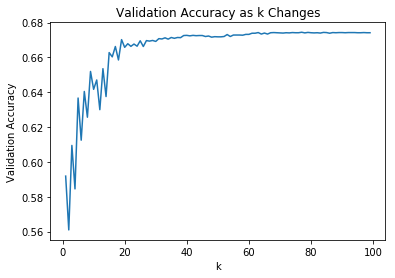

In [8]:
K_AccuracyScoreDF = pd.DataFrame()

for k in range(1, 100):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_set[['drinks_code', 'drugs_code', 'orientation_code', 'sex_code', 'smokes_code', 'status_code']], training_set['is_music'])
    score = classifier.score(validation_set[['drinks_code', 'drugs_code', 'orientation_code', 'sex_code', 'smokes_code', 'status_code']], validation_set['is_music'])
    score_list = [k, score]
    print(score_list)
    K_AccuracyScoreDF = K_AccuracyScoreDF.append({'KValue': k, 'Accuracy': score}, ignore_index=True)

print(K_AccuracyScoreDF.head())

plt.plot(K_AccuracyScoreDF['KValue'], K_AccuracyScoreDF['Accuracy'])
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as k Changes')
plt.show()

Hmmm..... looks like k around 63 looks to be around the best. Use that value of k to score and predict the validation and training sets:

In [9]:
classifier = KNeighborsClassifier(n_neighbors = 63)
classifier.fit(training_set[['drinks_code', 'drugs_code', 'orientation_code', 'sex_code', 'smokes_code', 'status_code']], training_set['is_music'])
validation_score = classifier.score(validation_set[['drinks_code', 'drugs_code', 'orientation_code', 'sex_code', 'smokes_code', 'status_code']], validation_set['is_music'])
validation_predict = classifier.predict(validation_set[['drinks_code', 'drugs_code', 'orientation_code', 'sex_code', 'smokes_code', 'status_code']])
print( 'Validation Score: ', validation_score)
training_score = classifier.score(training_set[['drinks_code', 'drugs_code', 'orientation_code', 'sex_code', 'smokes_code', 'status_code']], training_set['is_music'])
training_predict = classifier.predict(training_set[['drinks_code', 'drugs_code', 'orientation_code', 'sex_code', 'smokes_code', 'status_code']])
print( 'Training Score: ', training_score)

Validation Score:  0.6742281626506024
Training Score:  0.6686329264848923


In [11]:
print(classification_report(validation_set['is_music'], validation_predict))

              precision    recall  f1-score   support

         0.0       0.50      0.00      0.00      3461
         1.0       0.67      1.00      0.81      7163

   micro avg       0.67      0.67      0.67     10624
   macro avg       0.59      0.50      0.40     10624
weighted avg       0.62      0.67      0.54     10624



In [12]:
print(classification_report(training_set['is_music'], training_predict))

              precision    recall  f1-score   support

         0.0       0.47      0.00      0.00     10559
         1.0       0.67      1.00      0.80     21312

   micro avg       0.67      0.67      0.67     31871
   macro avg       0.57      0.50      0.40     31871
weighted avg       0.60      0.67      0.54     31871



## Step 4 Conclusions

Conclusions here are very similar to Step 3. The value counts for 'is_music' suggest about 2/3 of the entire dataset identifies with music to some degree. So the dataset is somewhat imbalanced in terms of musical interest. It would have been great of the dataset asked a specific questions like 'are you into music?' and/or 'are you a musician?'. An additional essay question asking the clients to detail their interest/involvement with music would have been very helpful.

All the messures (Accuracy, preceicion, recall and F1) are very similar for both the training and validation sets, which suggests overfitting the training data is not an issue here. Accuracy is an ok measure here as the dataset is not overly imbalanced. Precision in choosing 'is music' mirrors the Accuracy measures but is not so good at truely picking people with no musical interest. Recall and F1 suggest the model is very good at identifiying musical people. while not so good at identifiying non-musical people. 

Ideally I'd like to add some extra questions directly about music, and get a more even representation of musical and non-musical people/classes. I also wish I had time to explore the contribution each dependent variable in the model. 
Adding dependent variables directly related to identifying musical persuits would also be helpful in determining a good predictive model.

It's somewhat eerie to me that the outcome is so similar to Step 3, which used fewer dependent variables and a different classification technique. It suggests that the current set of dependent variables don't have much effect on the prediction. There doesn't seem to be much clustering of data for this, and the predictions are more to do with the slightly imbalanced data classes 